<div style="text-align: center;">
    <a target="_blank" href="https://colab.research.google.com/github/bmalcover/cursSocib/blob/main/2_AA/2_9_XAI_Practice.ipynb">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
</div>


# XAI

Explainable Artificial Intelligence (XAI) refers to methods and techniques in AI that make the results and processes of machine learning models understandable to humans. As AI systems become more complex, especially with models like deep neural networks, their decision-making becomes opaque or "black-box".

## Captum

[**Captum**](https://captum.ai/) is an open-source library developed by Facebook (Meta) that provides **model interpretability tools for PyTorch models**. The name "Captum" means "comprehension" in Latin, emphasizing the goal of understanding complex models.

Captum integrates seamlessly with PyTorch, making it easy to apply interpretability techniques to existing models with minimal changes.

We can apply it both to tabular and image problems

In [1]:
!pip install captum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 25.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [captum]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [6]:
import numpy as np
from PIL import Image

from torchvision import models
from torchvision import transforms

In [1]:
model = models.resnet18(pretrained=True)
model = model.eval()

img = Image.open("../assets/bloc2/cat.jpg")

/Users/miquelmn/miniconda3/envs/cursSocib/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/miquelmn/miniconda3/envs/cursSocib/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


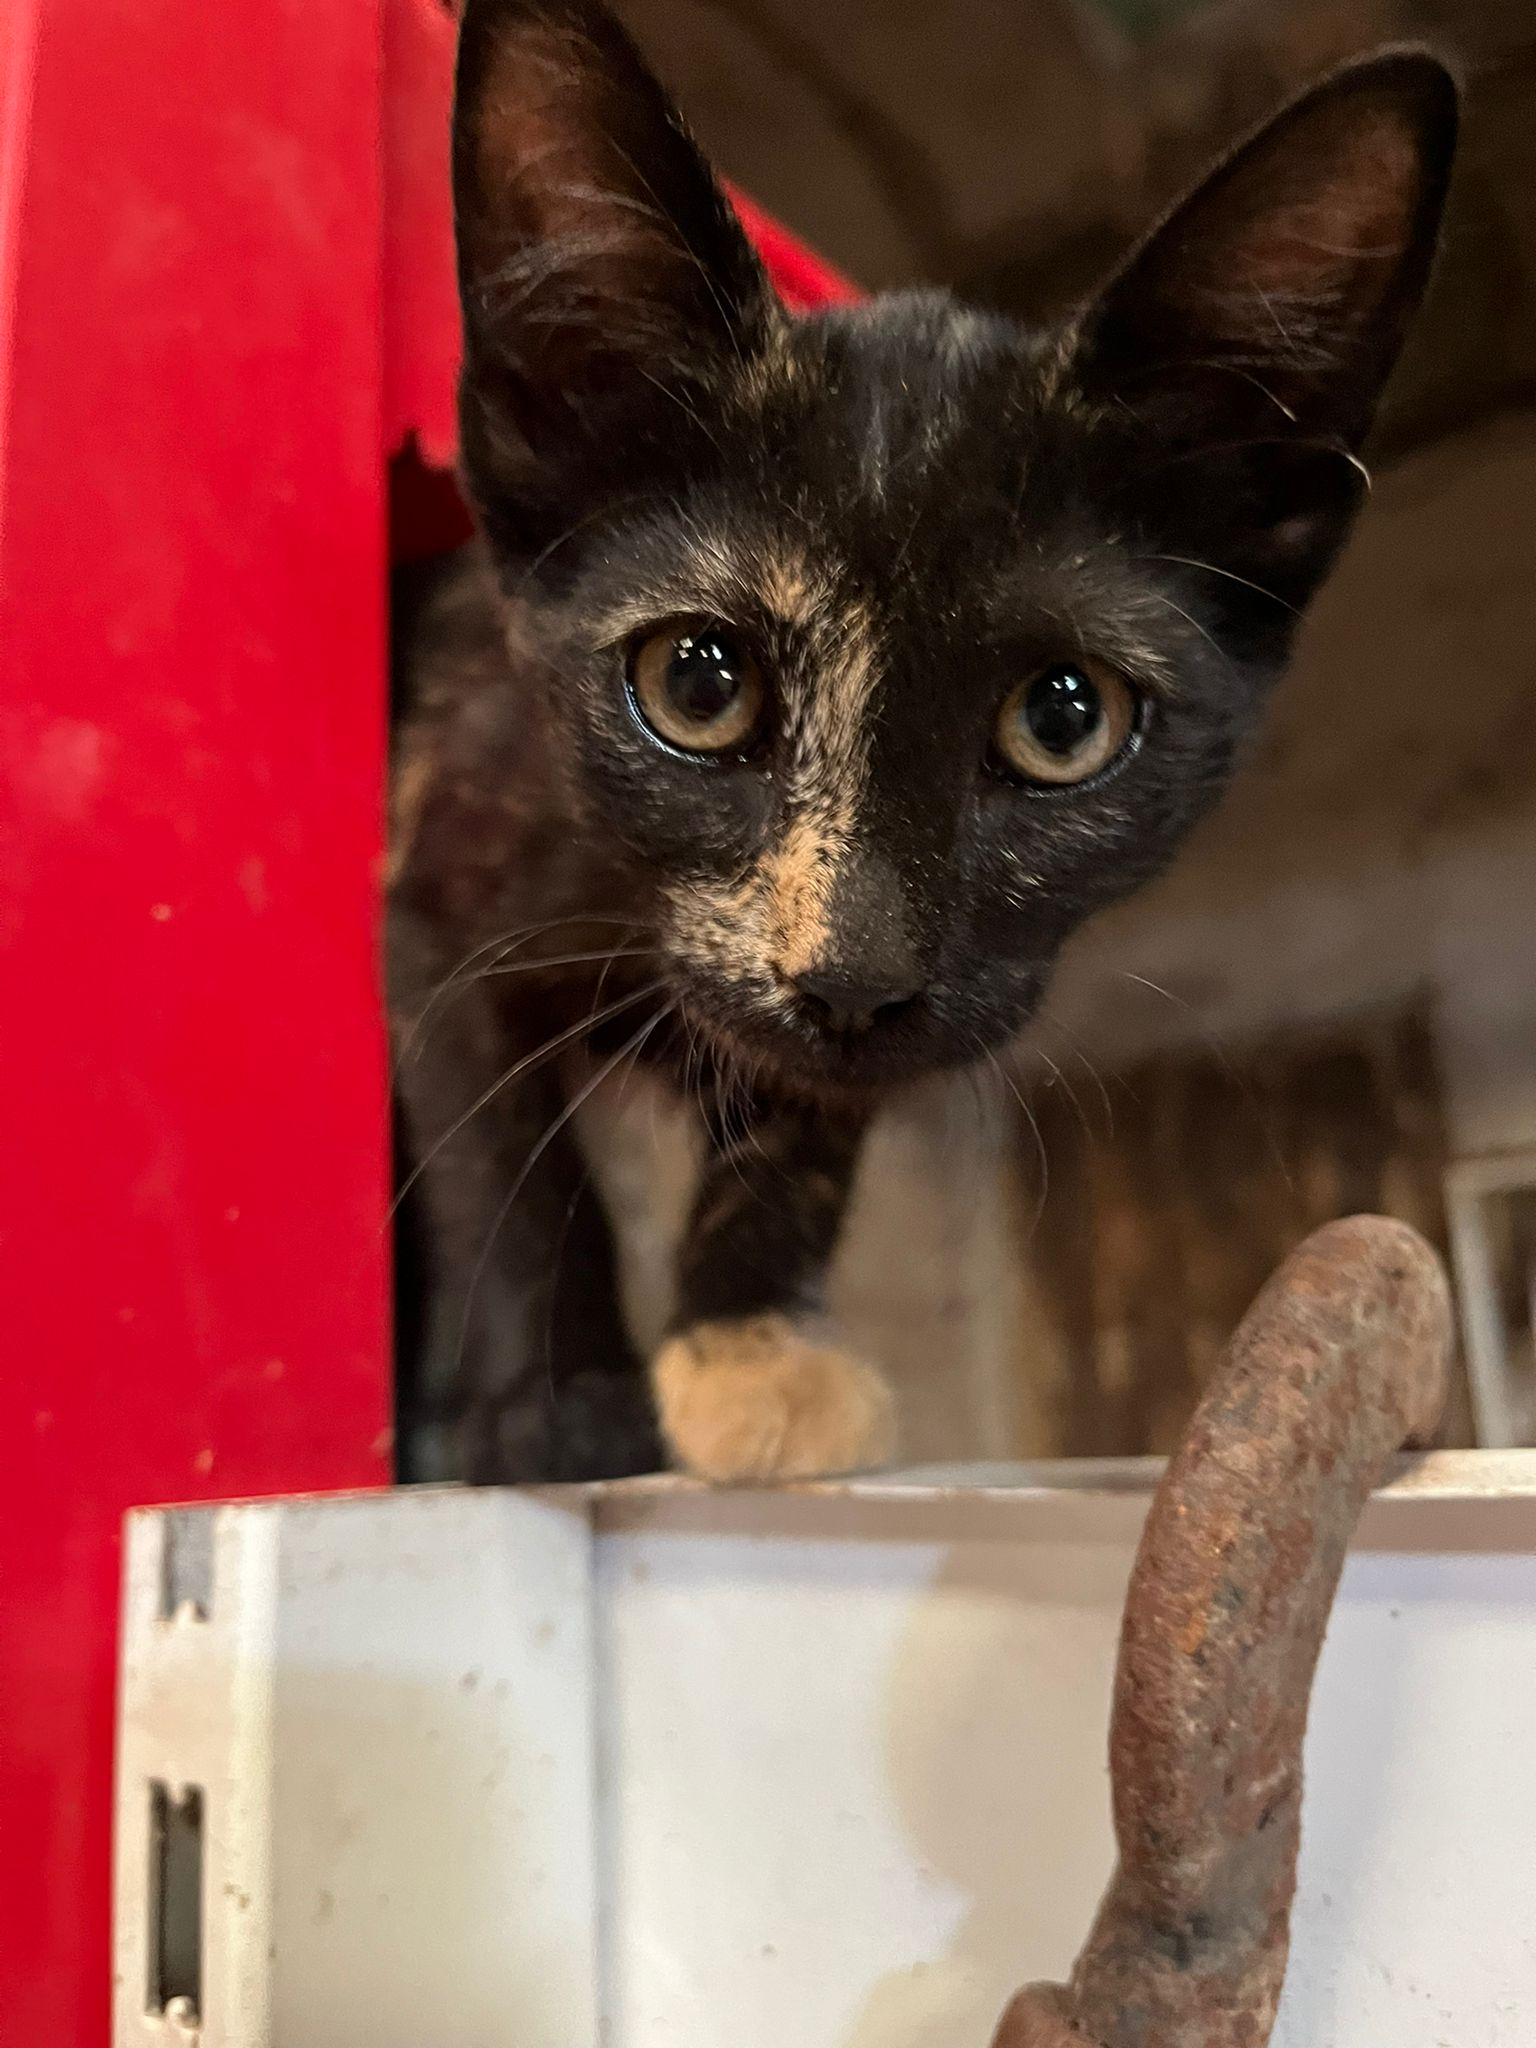

In [2]:
img

In [3]:
import torch

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

transformed_img = transform(img)

batch = transformed_img.reshape(1, 3, 224, 224)
res = model(batch)
torch.argmax(res)

tensor(285)

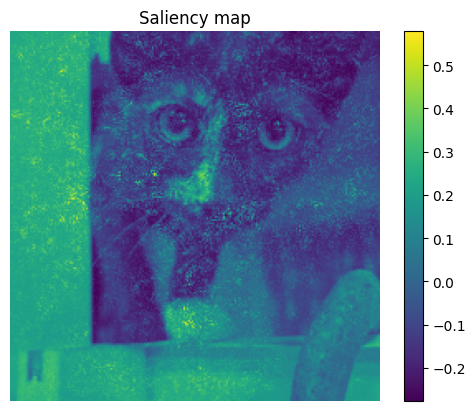

In [10]:
from captum.attr import Saliency
from matplotlib import pyplot as plt
import cv2

saliency = Saliency(model)
sal_map = saliency.attribute(batch, target=torch.argmax(res).cpu().int())

img1 = batch[0, 0, :, :].numpy() / batch[0, 0, :, :].numpy().max()
img2 = sal_map[0, 0, :, :].numpy() / sal_map[0, 0, :, :].numpy().max()

dst = cv2.addWeighted(img1, 0.3, img2, 0.7, 0.0)

plt.title("Saliency map")
plt.axis("off")
plt.imshow(dst)
plt.colorbar();

### Exercise

Try to do use another XAI methods from [Captum](https://captum.ai/) with another image.

NOTE: Use only attribution methods.